In [36]:
from collections import defaultdict, Counter

Create Node data from event_types and processed edges.

Create Edge data from event_log.

In [2]:
journey_rawdata = open("data/journey.csv").readlines()
print(journey_rawdata[:5])

['1624,9\n', '1624,5\n', '1624,9\n', '1624,40\n', '1624,40\n']


In [3]:
journeys = defaultdict(list)
for line in journey_rawdata:
    customer, event = line.split(',')
    event = int(event[:-1])
    customer = int(customer)
    journeys[customer].append(event)

In [6]:
journey_keys = iter(journeys.keys())
journeys[next(journey_keys)]

[1, 4]

In [40]:
def pairs(events, length_cap):
    events = list(enumerate(events[:length_cap]))
    return [(events[i], events[i+1]) for i in range(len(events) - 1)]

In [39]:
pairs([1,5,5,27,3],2)

[((0, 1), (1, 5))]

1. get set of pairs that actually occur
1. output to a file and record indices, ie create dict{pair: index}
1. create counter of union of journeys: dict(pair of pairs : count)
1. use lookup dict to map keys to dict(pair of indices : count)
1. output


What about subscription status? What can we glean from this file?

Definitely need to create groupings of event_types.

In [46]:
journey_segments = []
for j in journeys.values():
    journey_segments.extend(pairs(j, 5))

In [47]:
c = Counter(journey_segments)

In [48]:
len(c)

4628

In [33]:
lengths = []
for acct, j in journeys.items():
    lengths.append(len(j))
print(max(lengths))

4242


In [35]:
sorted(lengths)[-1000]

323

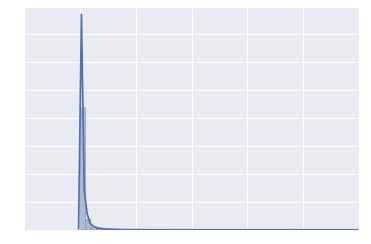

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(lengths)